# Draw Confusion Matrix
draw confusion martrix from saved .pt file.

In [129]:
import torch 

gait_cycle = 'swing'
sampling = 'over'
pref_path = "/workspace/skeleton/logs/resnet/2024-04-09/3/11-40-35/best_preds"

label = torch.load(f"{pref_path}/resnet_{sampling}_2_label.pt")
pred = torch.load(f"{pref_path}/resnet_{sampling}_2_pred.pt")

In [130]:
# class label balance

a = 0
b = 0
c = 0 

for i in label:
    if i == 0:
        a += 1
    elif i == 1:
        b += 1
    elif i == 2:
        c += 1

print(a, b, c)

4678 2051 1943


In [131]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(pred, label))
print('precision: %s' % _precision(pred, label))
print('_binary_recall: %s' % _recall(pred, label))
print('_binary_f1: %s' % _f1_score(pred, label))
print('_aurroc: %s' % _auroc(pred, label))
print('_confusion_matrix: %s' % _confusion_matrix(pred, label))
print('#' * 100)

****************************************************************************************************
accuracy: tensor(0.7505)
precision: tensor(0.8323)
_binary_recall: tensor(0.7505)
_binary_f1: tensor(0.7727)
_aurroc: tensor(0.9196)
_confusion_matrix: tensor([[0.9286, 0.0584, 0.0130],
        [0.2058, 0.7830, 0.0112],
        [0.3639, 0.0962, 0.5399]])
####################################################################################################


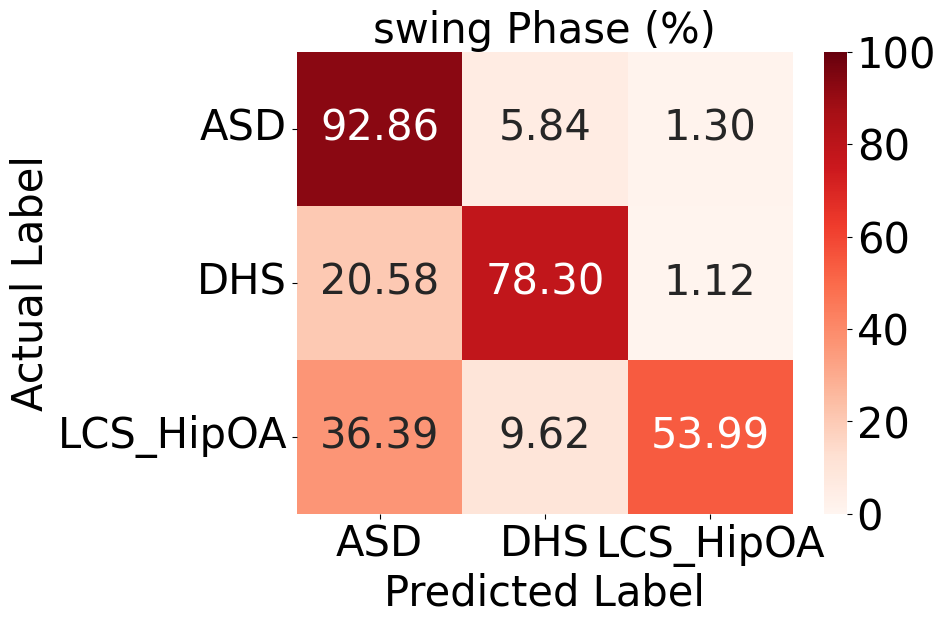

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(pred, label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'{gait_cycle} Phase (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()

In [133]:
# load all fold 
all_label = []
all_pred = []	

for i in range(3):
	label = torch.load(f"{pref_path}/resnet_{sampling}_{i}_label.pt")
	pred = torch.load(f"{pref_path}/resnet_{sampling}_{i}_pred.pt")
	all_label.append(label)
	all_pred.append(pred)
	

In [134]:
len(all_label), all_label[0].shape

(3, torch.Size([7584]))

In [135]:
all_label = torch.cat(all_label)
all_pred = torch.cat(all_pred)

In [136]:
all_label.shape, all_pred.shape

(torch.Size([26080]), torch.Size([26080, 3]))

****************************************************************************************************
accuracy: tensor(0.5149)
precision: tensor(0.7105)
_binary_recall: tensor(0.5149)
_binary_f1: tensor(0.5361)
_aurroc: tensor(0.7655)
_confusion_matrix: tensor([[0.9572, 0.0215, 0.0213],
        [0.6432, 0.3100, 0.0468],
        [0.6838, 0.0389, 0.2774]])
####################################################################################################


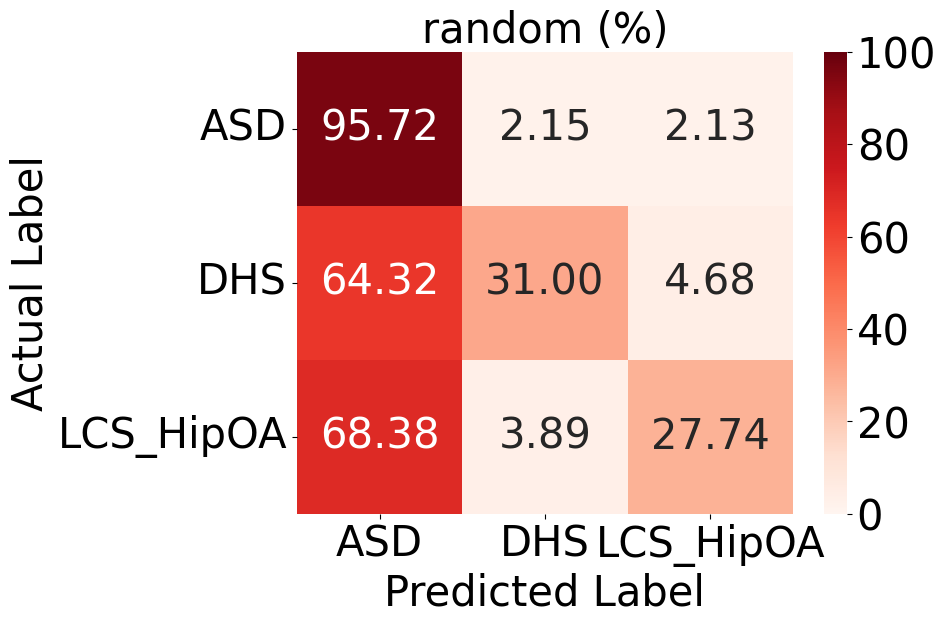

In [137]:
from torchmetrics.classification import (
    MulticlassAccuracy,
    MulticlassPrecision,
    MulticlassRecall,
    MulticlassF1Score,
    MulticlassConfusionMatrix,
    MulticlassAUROC,
)

# define metrics 
num_class = 3
_accuracy = MulticlassAccuracy(num_class)
_precision = MulticlassPrecision(num_class)
_recall = MulticlassRecall(num_class)
_f1_score = MulticlassF1Score(num_class)
_auroc = MulticlassAUROC(num_class)
_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")


print('*' * 100)
print('accuracy: %s' % _accuracy(all_pred, all_label))
print('precision: %s' % _precision(all_pred, all_label))
print('_binary_recall: %s' % _recall(all_pred, all_label))
print('_binary_f1: %s' % _f1_score(all_pred, all_label))
print('_aurroc: %s' % _auroc(all_pred, all_label))
print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))
print('#' * 100)

import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体和标题样式
plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})

# 假设的混淆矩阵数据
confusion_matrix_data = _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

# 使用matplotlib和seaborn绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
plt.title(f'random (%)', fontsize=30)
plt.ylabel('Actual Label', fontsize=30)
plt.xlabel('Predicted Label', fontsize=30)
plt.show()